# Изследване на разпространението на COVID-19 със SIR-подобни модели
--------
Беатрис Бонева, ИМММ

![curve](images/curve.jpeg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from classic_SIR import SIRModel, SIRModelLogisticR0, fit_sir

### SIR моделът

* $S$ - Susceptibles - податливи на заразяване
* $I$ - Infected - заразени
* $R$ - Removed - премахнати (оздравели и умрели)

$$\begin{eqnarray}
\frac{dS}{dt} &=& -\beta SI \\
\frac{dI}{dt} &=& \beta SI - \gamma I \\
\frac{dR}{dt} &=& \gamma I \\
\end{eqnarray}$$

![SIR_flow_diagram](images/SIR_Flow_Diagram.png)

Начални условия:

$$S(0)=S_0, I(0)=I_0, R(0)=0 $$

Предположения:
1. Цялата популация остава константна, т.е. $S+R+I=S_0+I_0$
2. Темпът на нарастване на $I$ е пропорционален на срещите между $S$ и $I$ ($\beta$)
3. Хомогенност в срещите между $S$ и $I$
4. $I$ се излекуват и умират с константен темп ($\gamma$)

### Кога и при какви условия се разпространява епидемията?

Интересуваме се от изменението на броя инфектирани индивиди, т.е. $ \frac{dI}{dt} $.

$ S \le S_0 $, защото $ \frac{dS}{dt} < 0 $.

Следователно,
$$ \frac{dI}{dt} < I (\beta S_0 - \gamma) $$

Епидемията ще се разпространява при $ \beta S_0 - \gamma > 0 \iff S_0 > \frac{\gamma}{\beta}=\frac{1}{q}$, където $q=\frac{\beta}{\gamma}$ е т.нар. "contact ratio".

Или записано по друг начин:
**$$ R_0=\frac{\beta S_0}{\gamma} > 1$$**

**$R_0$ - "basic reproduction number"**

>$$\begin{eqnarray}
\frac{dS}{dt} &=& -\beta SI \\
\frac{dI}{dt} &=& \beta SI - \gamma I \\
\frac{dR}{dt} &=& \gamma I \\
\end{eqnarray}$$
>
>$S(0)=S_0, I(0)=I_0, R(0)=0 $
>
>$N=S+R+I=S_0+I_0$

### Какъв е максималният брой инфектирани индивиди?

$I_{max}=?$

$\frac{\frac{dI}{dt}}{\frac{dS}{dt}} = \frac{\beta I S - \gamma I}{- \beta I S}$

$\bf \frac{dI}{dS} = -1 + \frac{\gamma}{\beta S} = -1 + \frac{1}{q S}$

$\int\frac{dI}{dS} dS = -\int dS + \int \frac{1}{q S} dS$

$I = -S + \frac{1}{q} \ln S + C$

Константата $C$ намираме от началните условия:
$C = I_0 + S_0 - \frac{1}{q} \ln S_0$

От това, че $I_{max}$ е максимум следва, че $\frac{dI}{dS} = 0 \iff S=\frac{1}{q}$

Като заместим $C$ и $S$ с техните равни, за $I_{max}$ получаваме:

$$ \bf I_{max} = \underbrace{I_0 + S_0}_{N} - \underbrace{\frac{1}{q} (1+\ln(\overbrace{q S_0}^{R_0}))}_{f(q)} $$

>$$\begin{eqnarray}
\frac{dS}{dt} &=& -\beta SI \\
\frac{dI}{dt} &=& \beta SI - \gamma I \\
\frac{dR}{dt} &=& \gamma I \\
\end{eqnarray}$$
>
>$S(0)=S_0, I(0)=I_0, R(0)=0 $
>
>$N=S+R+I=S_0+I_0$
>
>$q=\frac{\beta}{\gamma}$ - contact ratio
>
>$ R_0=q S_0=\frac{\beta S_0}{\gamma}$ - basic reproduction number

In [2]:
def plot_f(q, f, S0):
    plt.figure(dpi=150)
    plt.xlabel('q')
    plt.plot(q, f, label="$f(q)$")
    plt.plot(q, [S0]*len(q), '--', label="$S_0$")
    plt.legend()
    plt.show()

### Какъв е максималният брой инфектирани индивиди?

$$ \bf I_{max} = \underbrace{I_0 + S_0}_{N} - \underbrace{\frac{1}{q} (1+\ln(\overbrace{q S_0}^{R_0}))}_{f(q)} $$

>$q=\frac{\beta}{\gamma}$ - contact ratio
>
>$ R_0=q S_0$ - basic reproduction number

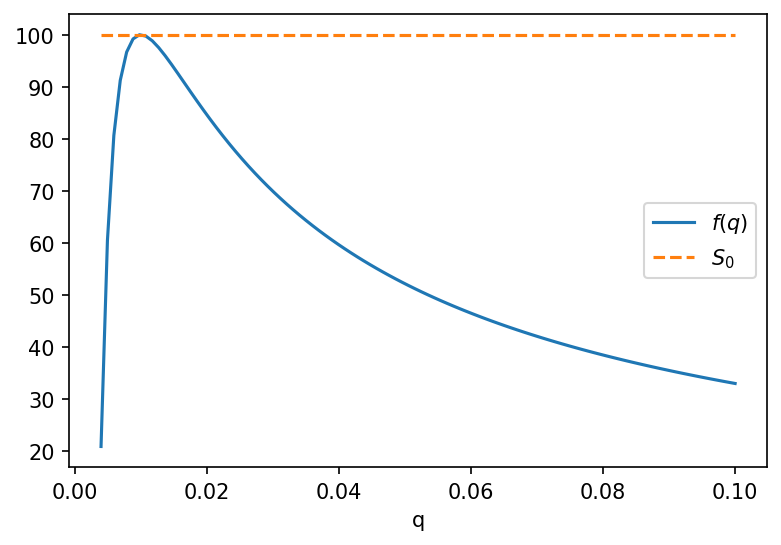

In [3]:
S0=100
q = np.linspace(0.004,0.1,100)
f = 1/q * (1 + np.log(q*S0))
plot_f(q, f, S0)

### Скалиран SIR модел

$$\begin{eqnarray}
\frac{dS}{dt} &=& -\frac{\beta}{\color{red}N}SI \\
\frac{dI}{dt} &=& \frac{\beta}{\color{red}N}SI - \gamma I \\
\frac{dR}{dt} &=& \gamma I \\
\end{eqnarray}$$

$R_0 = \frac{\beta}{\gamma}$

$\frac{dI}{dt} = (R_0 \frac{S}{N} - 1) \gamma I$

Следователно,
- $R_0 > \frac{N}{S_0} \approx 1$ - epidemic outbreak
- $R_0 < \frac{N}{S_0} \approx 1$ - не се разпространява

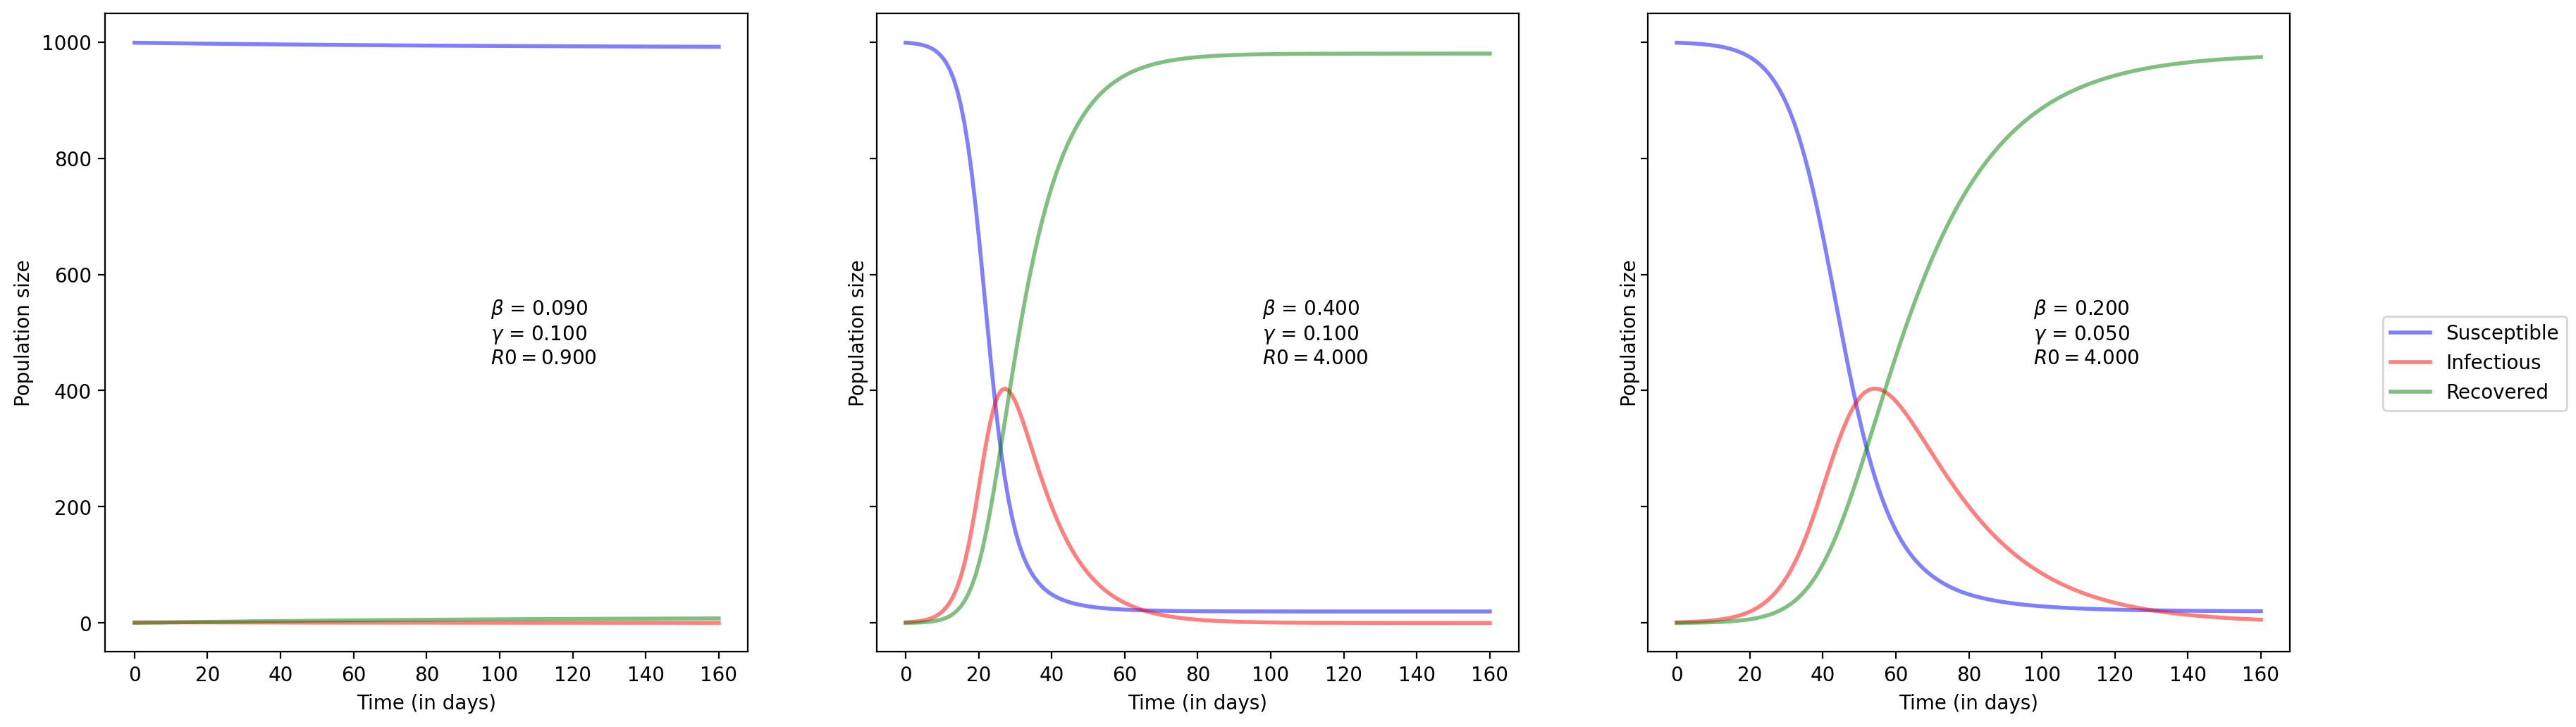

In [17]:
# Total population, N.
N = 1000
# A grid of time points (in days)
t = np.linspace(0, 160, 160)
# Initial conditions vector (S, I, R)
y0 = 999, 1, 0

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, dpi=200, figsize=(20,6))

SIRModel(y0).solve(t, N, 0.09, 1./10).subplot(ax_l)
SIRModel(y0).solve(t, N, 0.4, 1./10).subplot(ax_c)
SIRModel(y0).solve(t, N, 0.2, 1./20).subplot(ax_r)

handles, labels = ax_r.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.show()

### Параметрична идентификация

0. Данните са регистрираните инфектирани, излекувани и умрели по дни в различни държави и райони от университета [Johns Hopkins](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) за периода от 22.01.2020 до 19.05.2020
1. Решаваме числено системата диференциални уравнения с [scipy.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) като използваме метод на Рунге-Кута от 4ти ред.
2. Правим параметрична идентификация с нелинейни най-малки квадрати с библиотеката [lmfit](https://lmfit.github.io/lmfit-py/), която реализира алгоритъма на Levenberg-Marquardt.
    1. На база на данните за инфектираните и оздравелите/умрелите
       1. Варираме двата параметъра
       2. Варираме само $\beta$
    2. Само на база на оздравелите/умрелите

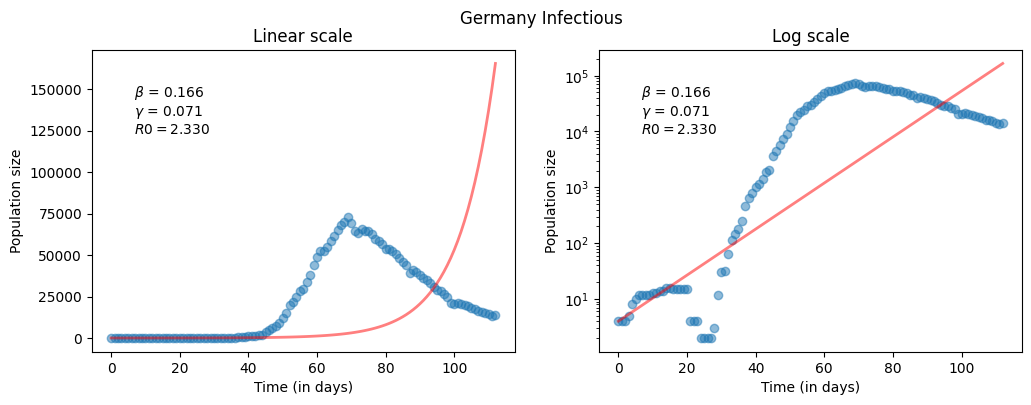

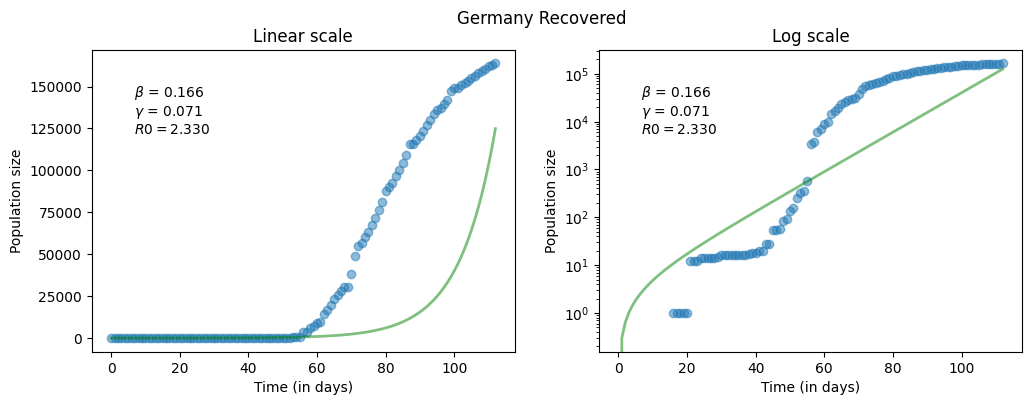

In [18]:
fit_sir(
    'Germany', 83754192,
    initial_guess={'beta': dict(value=0.2, vary=True), 'gamma': dict(value=1./14, vary=False)},
    fit_I=True, fit_R=True, extrapolate_days=0
)

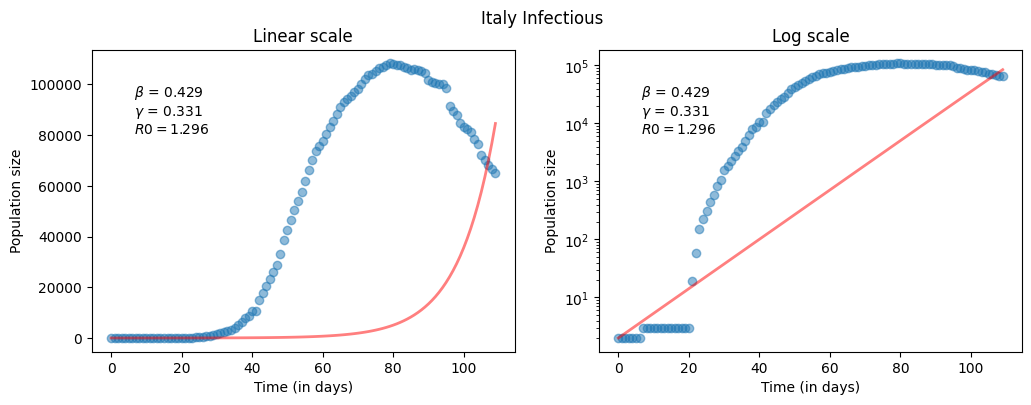

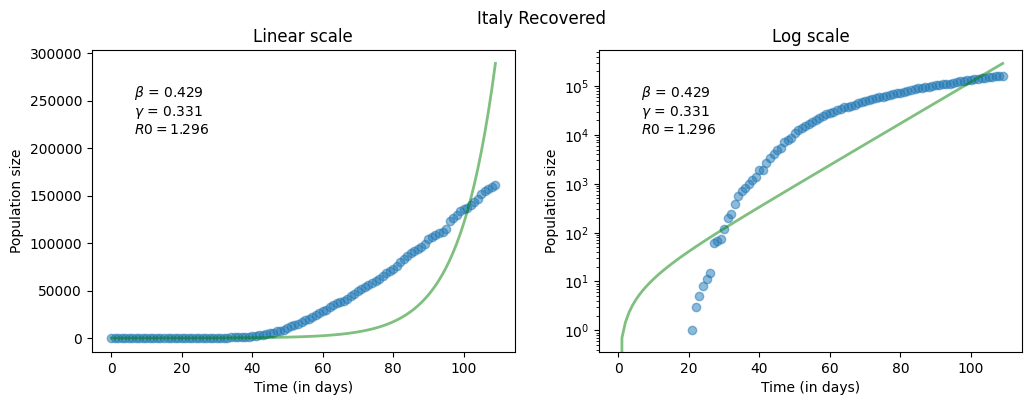

In [6]:
fit_sir(
    'Italy', 60461826,
    initial_guess={'beta': dict(value=0.2, vary=True), 'gamma': dict(value=1./14, vary=True)},
    fit_I=True, fit_R=True, extrapolate_days=0
)

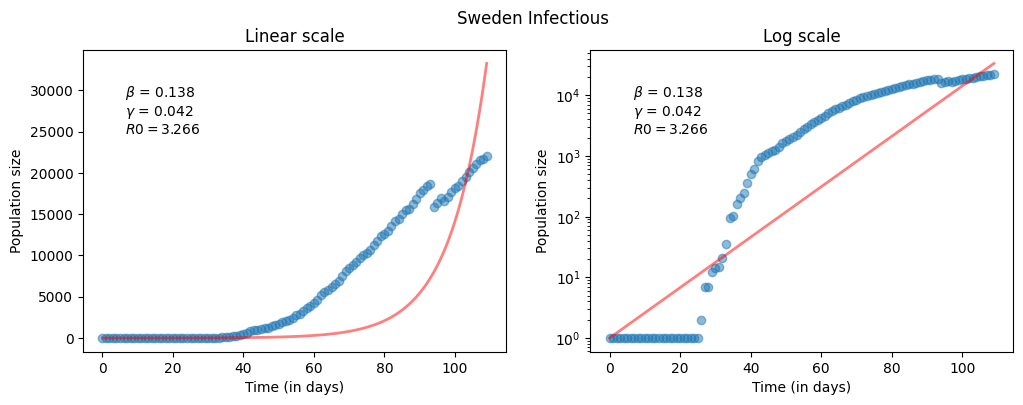

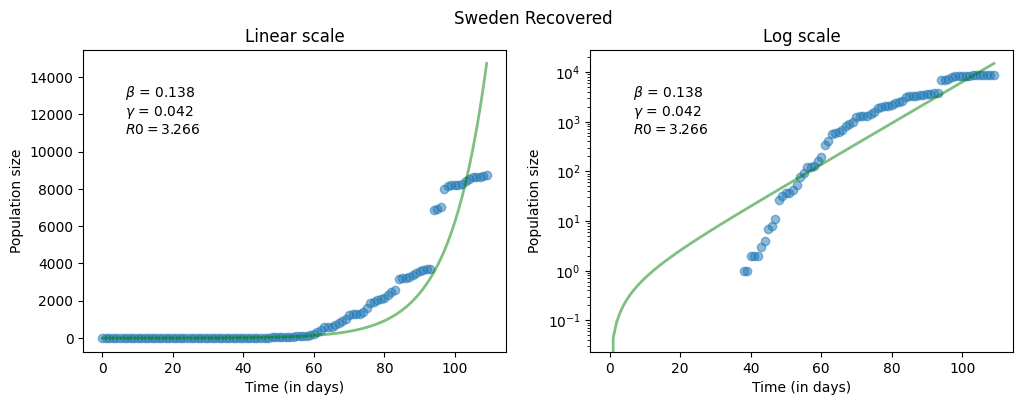

In [7]:
fit_sir(
    'Sweden', 10099265,
    initial_guess={'beta': dict(value=0.2, vary=True), 'gamma': dict(value=1./14, vary=True)},
    fit_I=True, fit_R=True, extrapolate_days=0
)

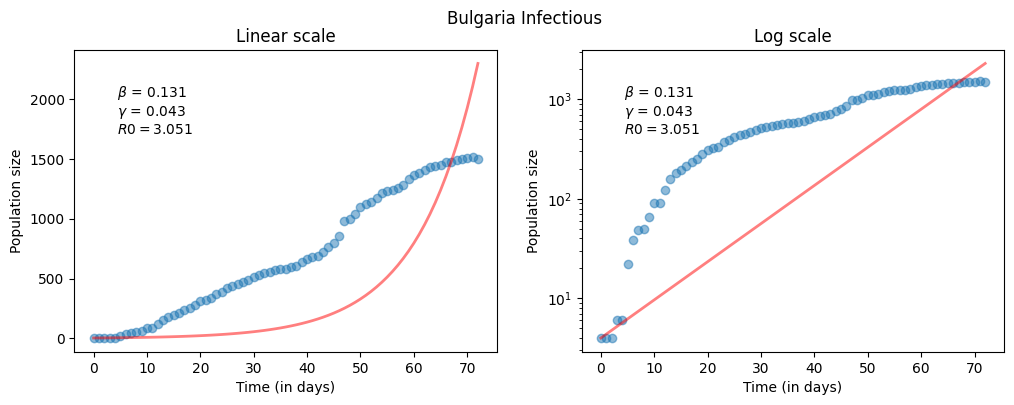

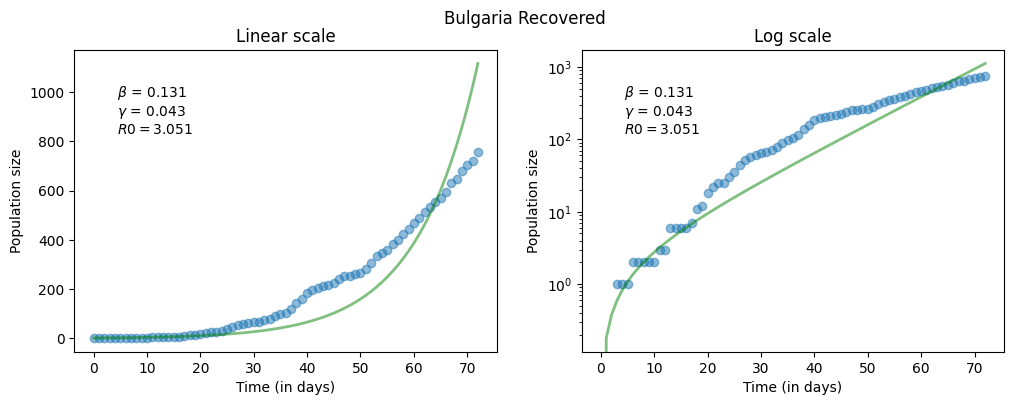

In [8]:
fit_sir(
    'Bulgaria', 6948445,
    initial_guess={'beta': dict(value=0.2, vary=True), 'gamma': dict(value=1./14, vary=True)},
    fit_I=True, fit_R=True, extrapolate_days=0
)

### Проблеми при моделирането на COVID-19 с класическия SIR модел

Както видяхме, най-простият SIR модел не описва добре наблюденията.
Основните причини за това са:
1. Не се взимат предвид **превантивните мерки**, които редица държави наложиха. Т.е. предположението ни за константен параметър на контакт и заразяване не отговаря на реалността.
2. Не разграничаваме излекуваните и **фаталните случаи**. Съответно и вероятността за излекуване и фатален изход е една и съща.
3. Не се допуска **инкубационен период**, т.е. време през което даден индивид може да "носи" вируса, но да не е заразен (infected but not infectious). Според СЗО този период е около 5 дни.
4. Не взимаме предвид **асимптоматичните преносители**, които според много проучвания играят съществена роля за разпространението на болестта.
5. Разчитаме, че **популацията е константна**, което очевидно не е вярно. При по-дълъг период на разпространение на епидемията, това също може да е от съществено значение.

### Моделиране на мерки за ограничаване на разпространението на COVID-19

$$\begin{eqnarray}
\frac{dS}{dt} &=& -\frac{\color{red}{\beta(t)} SI}{N} \\
\frac{dI}{dt} &=& \frac{\color{red}{\beta(t)} SI}{N} - \gamma I \\
\frac{dR}{dt} &=& \gamma I \\
\end{eqnarray}$$

$R_0(t) = \frac{\beta(t)}{\gamma} \Rightarrow \beta(t) = R_0(t) \gamma$

$$\begin{eqnarray}
\frac{dS}{dt} &=& -\frac{\color{red}{R_0(t) \gamma} SI}{N} \\
\frac{dI}{dt} &=& (\frac{\color{red}{R_0(t)} S}{N} - 1) \gamma I \\
\frac{dR}{dt} &=& \gamma I \\
\end{eqnarray}$$

Моделиране на $R_0(t)$:
- Скок
$$ R_0(t) = \begin{cases} 
      4.2 & t \leq 40 \\
      0.7 & t > 40
   \end{cases}
$$
- По части константна функция
$$ R_0(t) = \begin{cases} 
      4.2 & t \leq 40 \\
      2.7 & 40 < t \leq 60 \\
      0.7 & t > 60
   \end{cases}
$$
- Логистична функция
$$
R_0(t) = \frac{R_{0_{start}} - R_{0_{end}}}{1+e^{-k (-t + t_0)}} + R_{0_{end}}
$$

### Логистична функция за $R_0(t)$

In [9]:
t = np.linspace(0, 120, 120)
R_0_start = 4.2
R_0_end = 0.7
t0 = 60

def logistic_R_0(t, k=0.3):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+t0))) + R_0_end


def plot_logistic(k_list):
    plt.figure(dpi=100)
    for k in k_list:
        plt.plot(t, logistic_R_0(t, k=k), label="k={}".format(k))
    plt.legend()
    plt.figtext(.2, .55, r'$R_{0_{start}}=$'+'{}\n'.format(R_0_start)+r'$R_{0_{end}}=$'+'{}\n'.format(R_0_end)+r'$t_0$={}'.format(t0))
    plt.show()

$
R_0(t) = \frac{R_{0_{start}} - R_{0_{end}}}{1+e^{-k (-t + t_0)}} + R_{0_{end}}
$

- $\bf R_{0_{start}}$ - $R_0$ в началото (преди мерките)
- $\bf R_{0_{end}}$ - $R_0$ след налагане на мерките
- $\bf t_0$ - инфлексна точка
- $\bf k$ - колко бързо намалява $R_0$

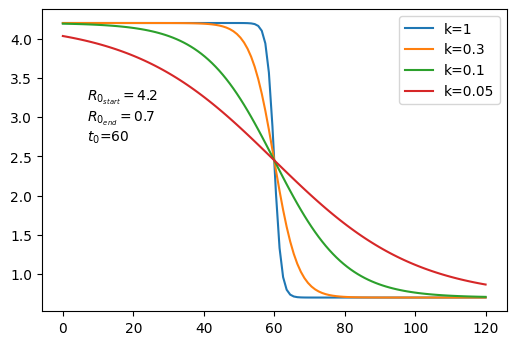

In [10]:
plot_logistic([1, 0.3, 0.1, 0.05])

{'gamma': 0.06444697929210576, 'R0_start': 3.404723338937137, 'R0_end': 0.4540762647068892, 'x0': 65.05350889834574, 'k': 0.23182109346196167}


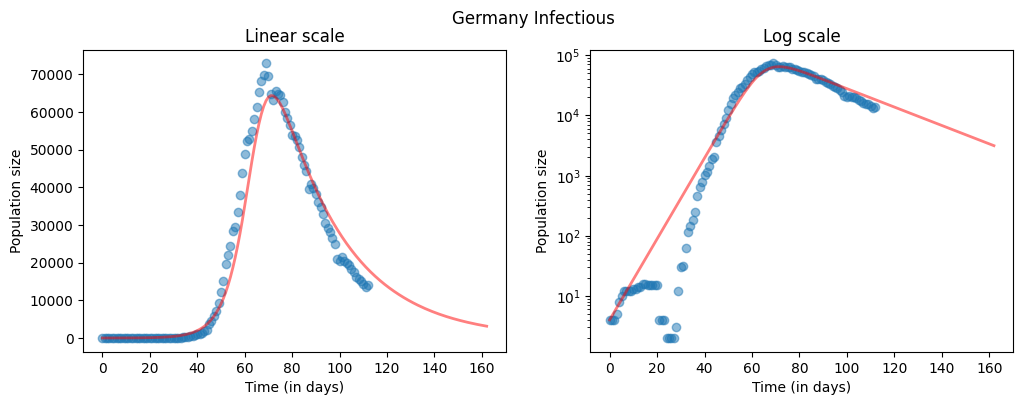

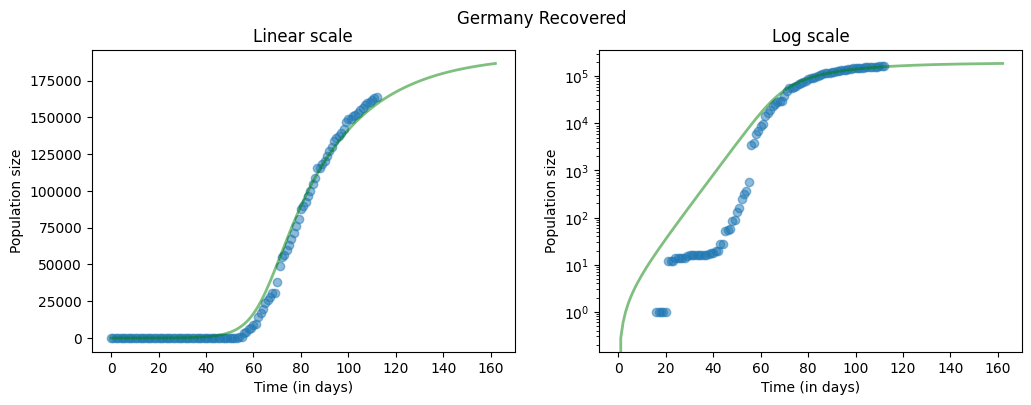

In [11]:
fit_sir(
    'Germany', 83754192,
    model=SIRModelLogisticR0, plot_R=True, extrapolate_days=50,
    initial_guess={
        'R0_start': dict(value=3.5, vary=True), 'R0_end': dict(value=0.5, vary=True),
        'x0': dict(value=60, vary=True), 'k': dict(value=0.5, vary=True),
        'gamma': dict(value=1./14, vary=True)
    }
)

{'gamma': 0.027357493103255238, 'R0_start': 11.45181819586797, 'R0_end': 0.26699179904074155, 'x0': 40.9056243509161, 'k': 0.07113285535860038}


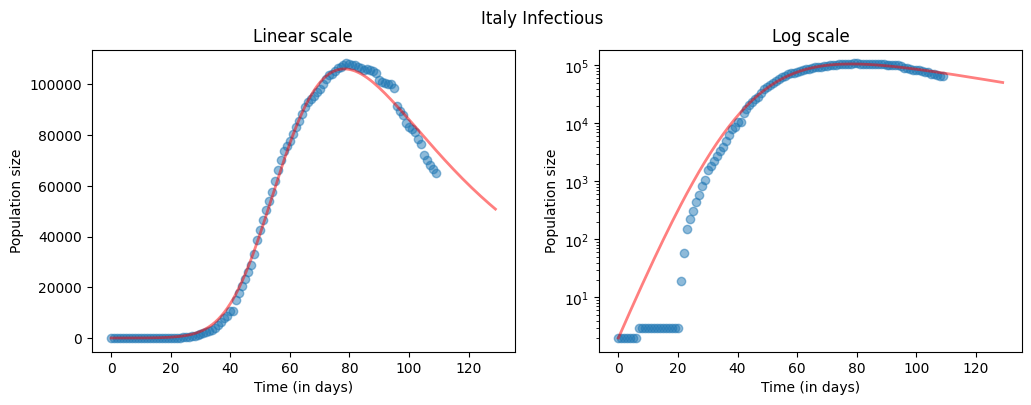

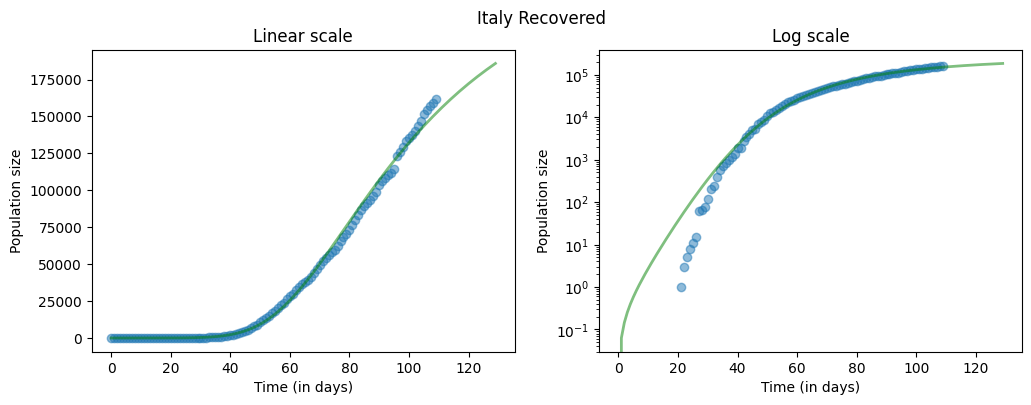

In [12]:
fit_sir(
    'Italy', 60461826,
    model=SIRModelLogisticR0, plot_R=True, extrapolate_days=20,
    initial_guess={
        'R0_start': dict(value=5, vary=True), 'R0_end': dict(value=0.2, vary=True),
        'x0': dict(value=30, vary=True), 'k': dict(value=0.5, vary=True),
        'gamma': dict(value=1./14, vary=True)
    }
)

{'gamma': 0.013516255042053445, 'R0_start': 12.57800869454677, 'R0_end': 1.7413757863639119, 'x0': 60.76293918464825, 'k': 0.08943118126921798}


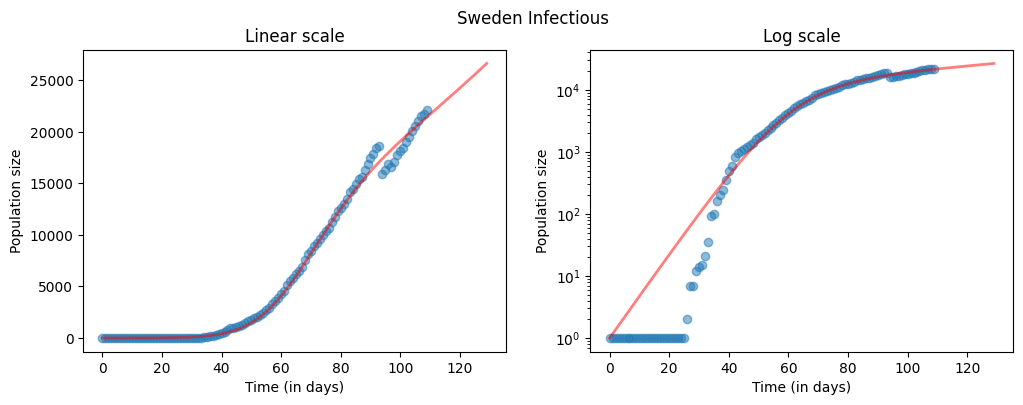

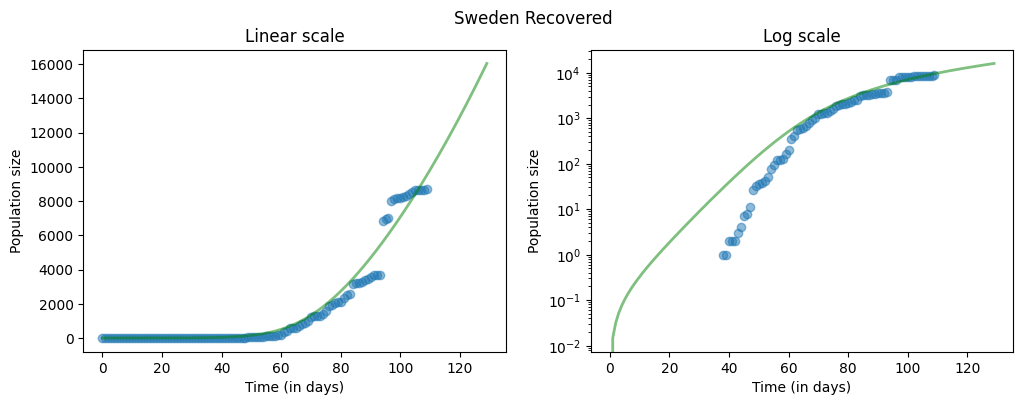

In [13]:
fit_sir(
    'Sweden', 10099265,
    model=SIRModelLogisticR0, plot_R=True, extrapolate_days=20,
    initial_guess={
        'R0_start': dict(value=5, vary=True), 'R0_end': dict(value=0.5, vary=True),
        'x0': dict(value=30, vary=True), 'k': dict(value=0.5, vary=True),
        'gamma': dict(value=1./14, vary=True)
    }
)

{'gamma': 0.014754009392912826, 'R0_start': 45.51496677329846, 'R0_end': 2.3764896280832914, 'x0': 0.0021194053308057903, 'k': 0.096524348554067}


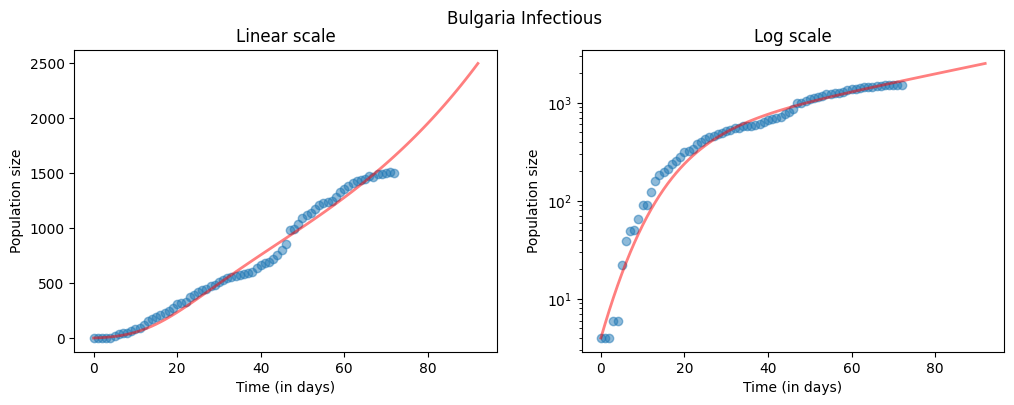

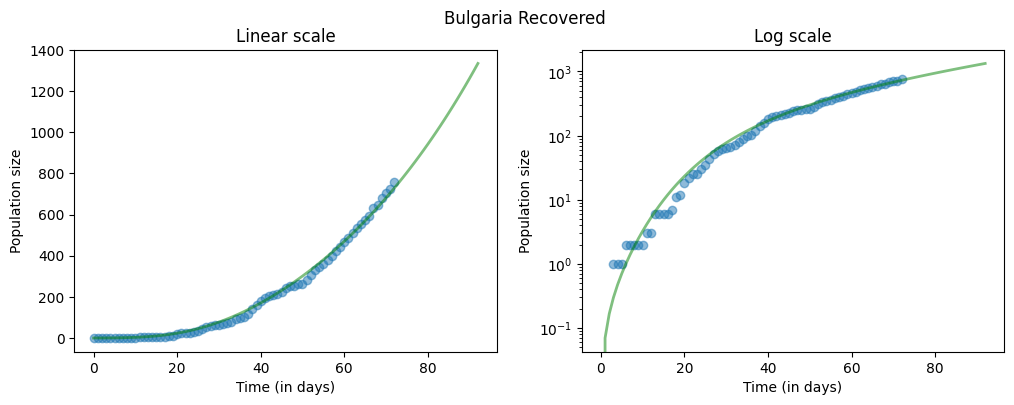

In [14]:
fit_sir(
    'Bulgaria', 6948445,
    model=SIRModelLogisticR0, plot_R=True, extrapolate_days=20,#fit_I=False,fit_S=False,
    initial_guess={
        'R0_start': dict(value=4, vary=True, min=1), 'R0_end': dict(value=0.5, vary=True, min=0),
        'x0': dict(value=5, vary=True, min=0), 'k': dict(value=0.5, vary=True, min=0),
        'gamma': dict(value=1./5, vary=True, min=0)
    }
)

{'gamma': 0.016650177774572672, 'R0_start': 29.24368136425008, 'R0_end': 4.970277746951801e-05, 'x0': 17.5647591011328, 'k': 0.07508576588643172}


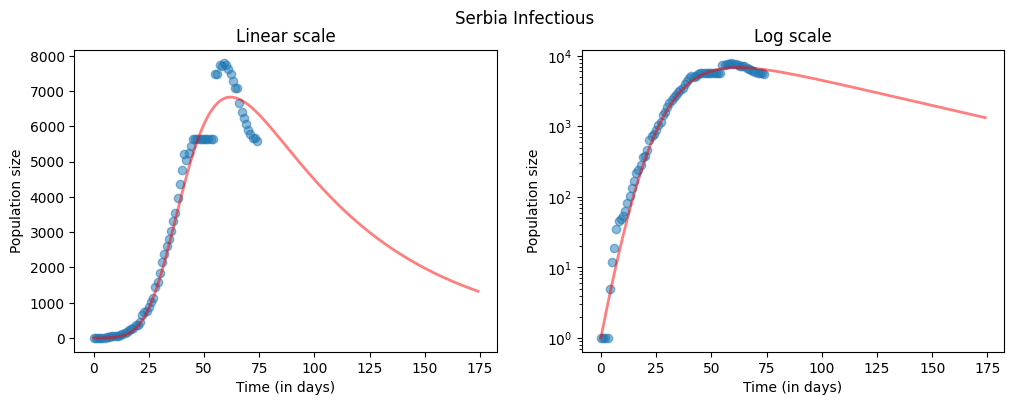

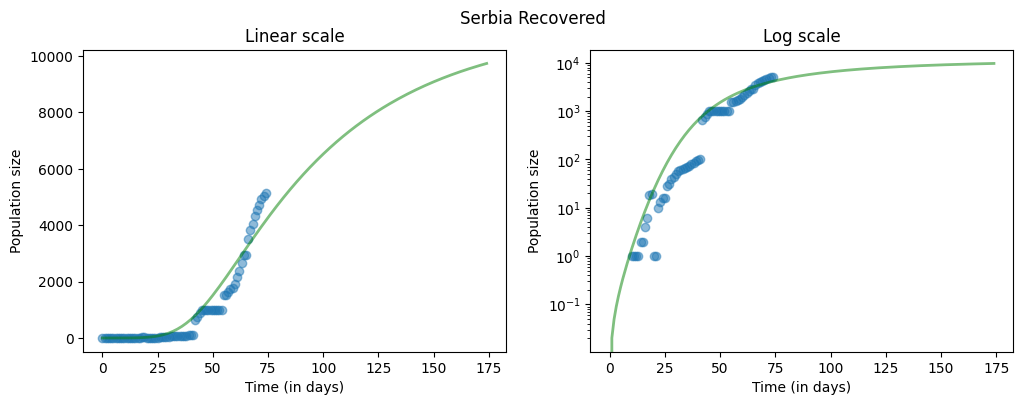

In [15]:
fit_sir(
    'Serbia', 8737371,
    model=SIRModelLogisticR0, plot_R=True, extrapolate_days=100,# fit_I=False,
    initial_guess={
        'R0_start': dict(value=4, vary=True, min=0), 'R0_end': dict(value=0.5, vary=True, min=0),
        'x0': dict(value=10, vary=True), 'k': dict(value=0.5, vary=True),
        'gamma': dict(value=1./5, vary=True, min=0)
    }
)

### Други подходи за намиране на параметрите зависещи от времето

Дискретизираме уравненията по метода на Ойлер (със стъпка 1 ден):

$$\begin{eqnarray}
S_{n+1} &=& S_n -\frac{{\beta(t)} SI}{N} \\
I_{n+1} &=& I_n + \frac{{\beta(t)} SI}{N} - \gamma I \\
R_{n+1} &=& R_n + \gamma I \\
\end{eqnarray}$$


Можем да изразим $\beta(t)$ и $\gamma(t)$ чрез $S$, $I$ и $R$ и да интерполираме по някакъв начин получените стойности на база на данните за инфектираните и премахнатите.

Примери за такива подходи са:
- https://arxiv.org/pdf/2004.11338.pdf - експоненциални сплайни между няколко дати, на които са наложени ограничения
- https://arxiv.org/pdf/2003.00122.pdf - използват се [finite impulse response (FIR)](https://en.wikipedia.org/wiki/Finite_impulse_response) филтри, чиито коефициенти се намират с помощта на [ridge regression (Tikhonov regularization)](https://en.wikipedia.org/wiki/Tikhonov_regularization)


### Инкубационен период, SEIR модел

$$\begin{eqnarray}
\frac{dS}{dt} &=& -\frac{\beta SI}{N} \\
\color{red}{\frac{dE}{dt}} &=& \color{red}{\frac{\beta SI}{N} - \epsilon E} \\
\frac{dI}{dt} &=& \color{red}{\epsilon E} - \gamma I \\
\frac{dR}{dt} &=& \gamma I \\
\end{eqnarray}$$


![SEIR](images/SEIR.png)

$R_0 = \frac{\beta}{\gamma}$

$\epsilon = \frac{1}{D}$, където D е средния брой дни на инкубационен период $\approx$ 9 дни

Динамиката на системата не се променя съществено. Основната разлика е, че се измества напред във времето - https://mathigon.org/pandemic

### SEIR-D модел

$$\begin{eqnarray}
\frac{dS}{dt} &=& -\frac{\beta SI}{N} \\
\frac{dE}{dt} &=& \frac{\beta SI}{N} - \epsilon E \\
\frac{dI}{dt} &=& \epsilon E - (\color{red}{\gamma_R (1-\delta) + \gamma_D \delta}) I \\
\frac{dR}{dt} &=& \gamma_R \color{red}{(1-\delta)} I \\
\color{red}{\frac{dD}{dt}} &=& \color{red}{\gamma_D \delta I} \\
\end{eqnarray}$$

*По този начин може да направим параметрична идентификация единствено на база на данните за смъртните случаи, за които се смята, че са най-достоверни.

![SEIRD](images/SEIRD2.png)

$R_0 = \frac{\beta}{{\gamma_R (1-\delta) + \gamma_D \delta}}$

- $\gamma_R$ - темпът на излекуване на пациентите
- $\gamma_D$ - темпът, с който умират заразените
- $\delta$ - вероятността за фатален край, $ 0 \le \delta \le 1 $

### Безсимптомни случаи

Безсимптомните (асимптоматични) преносители на заразата променят динамиката на системата по два интересни и противопоказателни начина, особено при липса на обща карантина:
1. От една страна, те нямат причина да се самоизолират и общуват с много повече хора. Съответно, **максималният брой инфектирани ще се увеличи** драстично.
2. От друга страна, ако приемем, че след излекуване от COVID-19, хората образуват имунитет за достатъчно дълго време, то асимптоматичните преносители **увеличават груповия имунитет** и спомагат за по-бързото отстраняване на заразата.

### Безсимптомни случаи, A-SEIRD модел

$$\begin{eqnarray}
\frac{dS}{dt} &=& -\frac{\beta S\color{red}{(I+A)}}{N} \\
\frac{dE}{dt} &=& \frac{\beta \color{red}{(I+A)}}{N} - \epsilon E \\
\frac{dI}{dt} &=& \epsilon \color{red}{(1-\alpha)} E - (\gamma_R (1-\delta) + \gamma_D \delta) I \\
\color{red}{\frac{dA}{dt}} &=& \color{red}{\epsilon \alpha E - \eta A} \\
\frac{dR}{dt} &=& \gamma_R (1-\delta) I \\
\frac{dD}{dt} &=& \gamma_D \delta I \\
\color{red}{\frac{dJ}{dt}} &=& \color{red}{\eta A}
\end{eqnarray}$$

![ASEIRD](images/A-SEIRD2.png)

- $A(t)$ - брой заразени и заразни! индивиди в момента t, но без или с леки симптоми
- $\alpha$ - вероятността болестта да протече безсимптомно. Оценките за $\alpha$ в литературата варират от около 1/10 до 1/3
- $\eta$ - темпът на излекуване (изчистване от вируса) на безсимптомните преносители

### SIR модел с неконстантна популация



$$\begin{eqnarray}
\frac{dS}{dt} &=& \color{red}\Lambda -\frac{\beta SI}{N} \color{red}{-\mu S} \\
\frac{dI}{dt} &=& \frac{\beta SI}{N} - \gamma I \color{red}{-\mu I}\\
\frac{dR}{dt} &=& \gamma I \color{red}{-\mu R} \\
\end{eqnarray}$$

- $\Lambda$ - коефициент на раждаемост
- $\mu$ - коефициент на смъртност

$\bf R_0 = \bf \frac{\beta \Lambda}{\mu (\mu+\gamma)}$

Имаме 2 (глобално асимпт. устойчиви - Mena-Lorca and Hethcote 1992) равновесни точки:
- $R_0 \le 1 \Rightarrow (\frac{\Lambda}{\mu},0,0)$ - "disease free equilibrium"
- $R_0 > 1 \Rightarrow (\frac{\gamma + \mu}{\beta}, \frac{\mu}{\beta} (R_0-1), \frac{\gamma}{\beta} (R_0-1))$ - "endemic equilibrium"

### Бъдещи планове

- Параметрична идентификация в A-SEIRD модела
- Моделиране на отпускане на мерките
  * Намиране на най-доброто време в което да се премахнат мерките за социална дистанция.
  * Анализ на разликите между рязко и по-плавно отпускане на мерките.
- Моделиране на стратегии за ваксинация

# Благодаря за вниманието!

<br>

>
>"All models are wrong, but some are useful." - George Box
>